# Opacities

This notebook shows how to create/read our **current** set of opacities. 

**Part 1** creates the opacities (this part will be updated), and **part 2** reads the created opacities (this part should stay the same). Both parts have their own `import` statements so that people without the tools to create the opacities could still use part 2 for reading in the resulting opacity files.

For now, I'll use the data file provided by Luca. This will change soon since the result should be reproducible and the averaging over size bins will be included.

--------------------------------
## Part 1: Creating the opacities

For now, just read from file and convert to our current format.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read from file and convert to pandas object

data = np.loadtxt('ricci_2010_orig/d_test_vacuum30.dust', skiprows=72)
df = pd.DataFrame(data, columns=['lambda', 'a', 'Qabs', 'Qsca', 'g'])

df.sort_values(['lambda', 'a'], inplace=True)

# get the size and wavelength arrays

a = df['a'].unique()
lam = df['lambda'].unique()

# transform the data into separate 2D numpy arrays

Qabs = np.array(df.pivot_table('Qabs', 'lambda', 'a', fill_value=None))
Qsca = np.array(df.pivot_table('Qsca', 'lambda', 'a', fill_value=None))
g = np.array(df.pivot_table('g', 'lambda', 'a', fill_value=None))

# calculate the opacities

k_abs = Qabs * np.pi * a**2
k_sca = Qsca * np.pi * a**2

Store the data

In [3]:
np.savez_compressed('default_opacities', a=a, lam=lam, k_abs=k_abs, k_sca=k_sca, g=g)

--------------------------------
## Part 2: Reading in from default format

As we update part 1, the opacities might change slightly, but this part should stay the same.

Imports for this part:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['seaborn',{'figure.dpi':150}])

Loading the data

In [2]:
data = np.load('default_opacities.npz')

a = data['a']
lam = data['lam']
k_abs = data['k_abs']
k_sca = data['k_sca']
g = data['g']

As an example: plot the opacities of the smallest grains as function of wavelength:

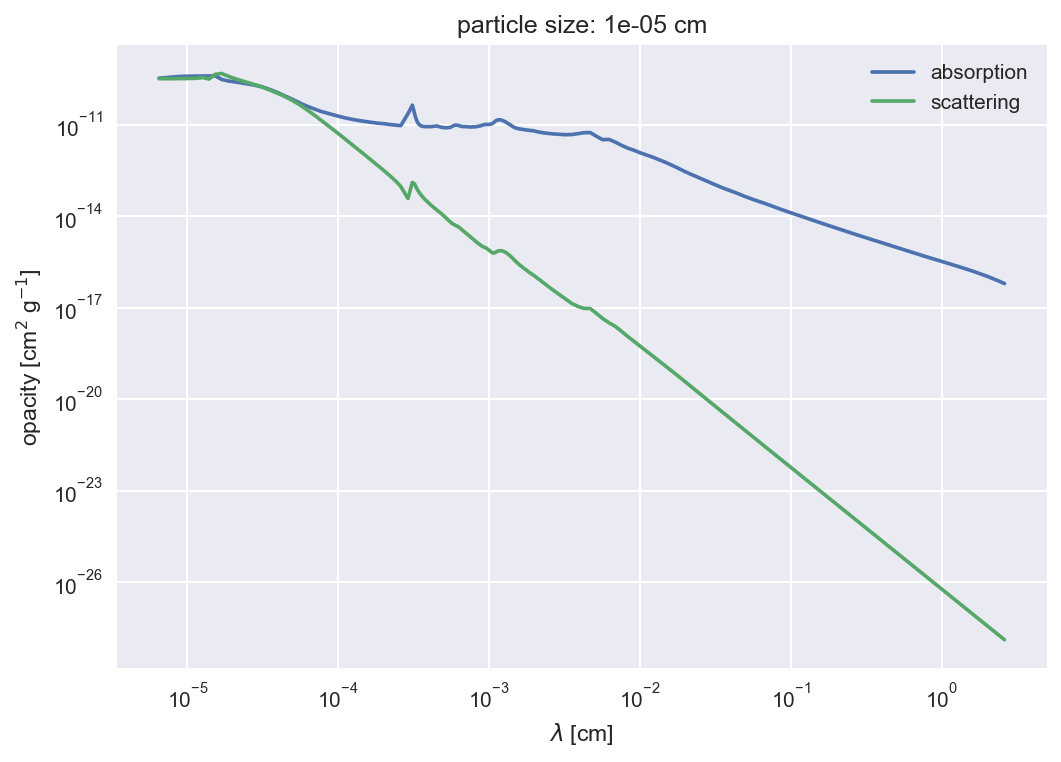

In [3]:
f, ax = plt.subplots()
ax.loglog(lam, k_abs[:, 0], label='absorption')
ax.loglog(lam, k_sca[:, 0], label='scattering')
ax.set_title(f'particle size: {a[0]} cm')
ax.set_ylabel('opacity [cm$^2$ g$^{-1}$]')
ax.set_xlabel('$\lambda$ [cm]')
ax.legend();